<a href="https://colab.research.google.com/github/kikiru328/enterprise_analysis/blob/main/Keras_dl_news_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

In [107]:
import tensorflow as tf
from tensorflow import keras
tf.keras.__version__

'2.6.0'

In [108]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data,test_labels)=reuters.load_data(num_words=10000)

In [109]:
print(len(train_data))
print(len(test_data))

8982
2246


In [110]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [111]:
import pandas as pd
pd.Series(train_labels).nunique()

46

In [112]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [113]:
print(len(x_train[0]))
print(len(x_test[0]))

10000
10000


In [114]:
def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [115]:
print(len(one_hot_train_labels[0]))

46


In [116]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [117]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [118]:
model.compile(optimizer= 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])


In [119]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [120]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data= (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 20ms/step - loss: 2.5004 - accuracy: 0.5237 - val_loss: 1.6367 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.3712 - accuracy: 0.7060 - val_loss: 1.2626 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.0327 - accuracy: 0.7851 - val_loss: 1.1151 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8279 - accuracy: 0.8236 - val_loss: 1.0007 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6658 - accuracy: 0.8578 - val_loss: 0.9505 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5358 - accuracy: 0.8849 - val_loss: 0.9123 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4382 - accuracy: 0.9055 - val_loss: 0.8873 - val_accuracy: 0.8120
Epoch 8/20
16

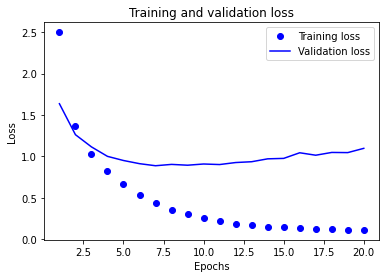

In [121]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

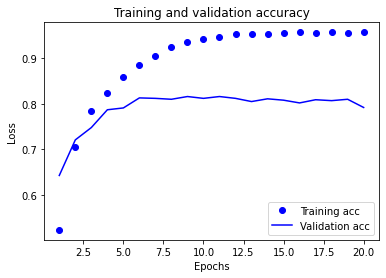

In [122]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [123]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer= 'rmsprop',loss= 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data= (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 20ms/step - loss: 2.6639 - accuracy: 0.5145 - val_loss: 1.8009 - val_accuracy: 0.6300
Epoch 2/9
16/16 [==============================] - 0s 10ms/step - loss: 1.4602 - accuracy: 0.6909 - val_loss: 1.3374 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 0s 11ms/step - loss: 1.0780 - accuracy: 0.7656 - val_loss: 1.1578 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 0s 10ms/step - loss: 0.8529 - accuracy: 0.8202 - val_loss: 1.0419 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 10ms/step - loss: 0.6821 - accuracy: 0.8553 - val_loss: 0.9767 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5485 - accuracy: 0.8856 - val_loss: 0.9340 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.4408 - accuracy: 0.9065 - val_loss: 0.8943 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [125]:
results

[0.9899426102638245, 0.7853962779045105]

In [126]:
predictions = model.predict(x_test)
predictions

array([[1.88945887e-05, 5.33797313e-04, 6.12356307e-05, ...,
        6.79414894e-04, 1.98299313e-05, 8.24407664e-07],
       [2.44108662e-02, 1.59938373e-02, 7.62830823e-05, ...,
        2.02564502e-06, 2.15579746e-07, 2.06708341e-04],
       [3.64060216e-02, 6.76372051e-01, 6.47602510e-03, ...,
        5.36041800e-04, 1.47456769e-04, 4.43205982e-03],
       ...,
       [4.00561157e-06, 9.86351166e-04, 5.70029079e-05, ...,
        3.43102234e-04, 4.01007019e-05, 3.29128966e-06],
       [1.94505381e-03, 1.21081196e-01, 4.89802752e-03, ...,
        2.34102760e-03, 4.86440578e-04, 2.94666039e-04],
       [1.69473118e-03, 7.08447635e-01, 3.73107642e-02, ...,
        8.88463110e-04, 3.83097795e-04, 6.50295930e-04]], dtype=float32)

In [127]:
predictions[0].shape

(46,)

In [128]:
np.sum(predictions[0])

1.0

In [129]:
np.argmax(predictions[0])

3

In [130]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 2.4515 - accuracy: 0.4996 - val_loss: 1.7121 - val_accuracy: 0.6000
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 1.4798 - accuracy: 0.6666 - val_loss: 1.4490 - val_accuracy: 0.6640
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2259 - accuracy: 0.7129 - val_loss: 1.3381 - val_accuracy: 0.6890
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.0799 - accuracy: 0.7304 - val_loss: 1.3346 - val_accuracy: 0.6860
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.9717 - accuracy: 0.7471 - val_loss: 1.2751 - val_accuracy: 0.6890
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.8891 - accuracy: 0.7622 - val_loss: 1.2788 - val_accuracy: 0.6920
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.8196 - accuracy: 0.7757 - val_loss: 1.3011 - val_accuracy: 0.6940
Epoch 8/20
63/63 [==

검증 정확도의 최고 값은 8% 정도 감소. 그 이유는 많은 정보 (46개 클래스의 분할 초평면 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려 했기 떄문이다. 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못함.

- N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막  Dense층의 크기는 N이어야 합니다.
- 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화 함수를 사용해야 합니다.
- 이런 문제에는 항상 범주형 크로스엔트로피를 사용해야 합니다. 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화합니다.
- 다중 분류에서 레이블을 다루는 두 가지 방법이 있습니다.
    - 레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고 categorical_crossentropy 손실 함수를 사용합니다.
    - 레이블을 정수로 인코딩하고 sparse_categorical_crossentropy 손실 함수를 사용합니다.
- 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 합니다.